# Basic packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 68)
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import joblib

# Data Import and EDA

In [9]:
df = pd.read_csv('../Resources/final_data2.csv')
df.drop(['state_code','county_code'],axis=1,inplace=True)
df.head()

,county_name,year,num_of_bedrooms,house_value_index,est_pop,median_hh_income,poverty_count,poverty_rate,st_abb,tax_rate,apr_30,points_30,apr_15,points_15
0,ATLANTIC,2010,1,"120,414.14",274654,51457,36693,13.60,NJ,2.67,4.69,0.72,4.10,0.67
1,ATLANTIC,2011,1,"106,680.39",274635,49983,35108,13.10,NJ,2.65,4.45,0.72,3.68,0.71
2,ATLANTIC,2012,1,"100,139.16",274657,50881,38245,14.20,NJ,2.73,3.66,0.72,2.93,0.68
3,ATLANTIC,2013,1,"94,991.76",274360,51668,46281,17.10,NJ,2.87,3.98,0.73,3.10,0.70
4,ATLANTIC,2014,1,"92,839.52",272634,54208,40761,15.10,NJ,2.84,4.17,0.59,3.29,0.57


In [10]:
df.shape

(1260, 14)

In [11]:
df.describe()

,year,num_of_bedrooms,house_value_index,est_pop,median_hh_income,poverty_count,poverty_rate,tax_rate,apr_30,points_30,apr_15,points_15
count,"1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00","1,260.00"
mean,"2,015.50",3.00,"301,526.97","423,663.90","76,414.14","42,851.11",10.05,3.38,3.92,0.63,3.22,0.60
std,3.45,1.41,"174,631.35","253,661.54","18,476.21","32,803.23",4.06,1.65,0.50,0.09,0.51,0.09
min,"2,010.00",1.00,"47,502.88","62,341.00","45,438.00","4,793.00",3.90,0.97,2.96,0.48,2.27,0.45
25%,"2,012.75",2.00,"171,183.50","150,928.75","61,363.25","16,560.50",6.67,2.47,3.66,0.53,2.93,0.49
50%,"2,015.50",3.00,"263,753.40","448,449.00","74,839.00","36,293.50",9.45,2.97,3.96,0.65,3.19,0.61
75%,"2,018.25",4.00,"388,531.82","603,111.25","87,602.25","63,450.25",13.10,3.69,4.24,0.72,3.46,0.69
max,"2,021.00",5.00,"1,312,995.76","953,819.00","123,708.00","136,161.00",20.10,9.66,4.69,0.73,4.10,0.71


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_name        1260 non-null   object 
 1   year               1260 non-null   int64  
 2   num_of_bedrooms    1260 non-null   int64  
 3   house_value_index  1260 non-null   float64
 4   est_pop            1260 non-null   int64  
 5   median_hh_income   1260 non-null   int64  
 6   poverty_count      1260 non-null   int64  
 7   poverty_rate       1260 non-null   float64
 8   st_abb             1260 non-null   object 
 9   tax_rate           1260 non-null   float64
 10  apr_30             1260 non-null   float64
 11  points_30          1260 non-null   float64
 12  apr_15             1260 non-null   float64
 13  points_15          1260 non-null   float64
dtypes: float64(7), int64(5), object(2)
memory usage: 137.9+ KB


In [13]:
df.corr()

,year,num_of_bedrooms,house_value_index,est_pop,median_hh_income,poverty_count,poverty_rate,tax_rate,apr_30,points_30,apr_15,points_15
year,1.00,-0.00,0.20,0.01,0.38,-0.04,-0.09,0.03,-0.65,-0.42,-0.53,-0.44
num_of_bedrooms,-0.00,1.00,0.71,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
house_value_index,0.20,0.71,1.00,0.27,0.33,0.15,-0.19,-0.02,-0.14,-0.04,-0.11,-0.05
est_pop,0.01,0.00,0.27,1.00,0.07,0.81,0.10,0.27,-0.01,-0.00,-0.01,-0.00
median_hh_income,0.38,0.00,0.33,0.07,1.00,-0.35,-0.84,-0.14,-0.23,-0.14,-0.18,-0.15
poverty_count,-0.04,-0.00,0.15,0.81,-0.35,1.00,0.58,0.37,-0.00,0.03,-0.02,0.03
poverty_rate,-0.09,0.00,-0.19,0.10,-0.84,0.58,1.00,0.23,0.02,0.05,-0.02,0.06
tax_rate,0.03,0.00,-0.02,0.27,-0.14,0.37,0.23,1.00,-0.01,-0.04,-0.00,-0.04
apr_30,-0.65,0.00,-0.14,-0.01,-0.23,-0.00,0.02,-0.01,1.00,-0.20,0.97,-0.18
points_30,-0.42,0.00,-0.04,-0.00,-0.14,0.03,0.05,-0.04,-0.20,1.00,-0.24,0.99


In [14]:
corr = df.corr()
fig = px.imshow(corr, aspect="auto",height=1000, title ='Correlation heatmap for 2020 data by Plotly')
fig.show()

<AxesSubplot:xlabel='num_of_bedrooms', ylabel='house_value_index'>

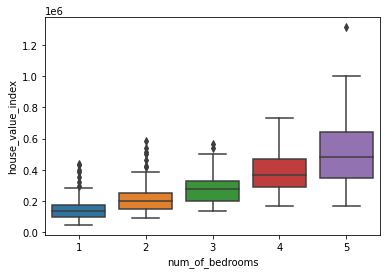

In [15]:
sns.boxplot(y='house_value_index',x='num_of_bedrooms',data=df)

# STEPWISE LINEAR REGRESSION

In [16]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [16]:
model = forward_selected(df.dropna(), 'house_value_index')
print("Selected features for the model:")
print(model.model.formula)
print("----------------------------------")
print("Adjusted R squared for the model:")
print(model.rsquared_adj)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\mosab\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-ae7503ee1c7a>", line 1, in <module>
    model = forward_selected(df.dropna(), 'house_value_index')
  File "<ipython-input-16-e83306c29a89>", line 28, in forward_selected
    score = smf.ols(formula, data).fit().rsquared_adj
  File "C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py", line 200, in from_formula
    tmp = handle_formula_data(data, None, formula, depth=eval_env,
  File "C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\formula\formulatools.py", line 63, in handle_formula_data
    result = dmatrices(formula, Y, depth, return_type='dataframe',
  File "C:\ProgramData\Anaconda3\lib\site-packages\patsy\highlevel.py", line 309, in dmatrices
    (lhs, rhs) = _do_highlevel_design(formula_like, data, eval_env,
  File "C:\

TypeError: object of type 'NoneType' has no len()

In [ ]:
print(model.summary())

In [49]:
filename = f'../Models/NJ_lin_reg2.sav'
joblib.dump(model, filename)

['../Models/NJ_lin_reg.sav']

# Array for prediction

In [6]:
model = joblib.load('../Models/NJ_lin_reg2.sav')

In [7]:
county='UNION'
beds=3
yr = 2026
best_array = df[(df[f'county_name']==county)&\
              (df['num_of_bedrooms']==beds)].tail(1)
best_array['year']=yr
# best_array['avg_tax_rate']=df[df['county_name']==county]['avg_tax_rate'].min()
best_array.reset_index(drop=True,inplace=True)
best_array

,county_name,year,min_tax_rate,avg_tax_rate,max_tax_rate,murder,rape,robbery,assault,burglary,larceny,auto_theft,avg_std_cnt_ele,avg_exp_ele,avg_score_ele,min_std_cnt_ele,min_exp_ele,min_score_ele,max_std_cnt_ele,max_exp_ele,max_score_ele,avg_std_cnt_mid,avg_exp_mid,avg_score_mid,min_std_cnt_mid,min_exp_mid,min_score_mid,max_std_cnt_mid,max_exp_mid,max_score_mid,avg_std_cnt_high,avg_exp_high,avg_score_high,min_std_cnt_high,min_exp_high,min_score_high,max_std_cnt_high,max_exp_high,max_score_high,est_pop,apr_30,points_30,apr_15,points_15,num_of_bedrooms,house_value_index,median_hh_income,poverty_count,poverty_rate
0,UNION,2026,2.16,8.55,29.27,31.00,89.00,455.00,843.00,745.00,"5,832.00","1,229.00",626.08,"9,387.66",45.65,141,"5,766.00",6.10,2182,"15,980.00",99.20,626.08,"9,387.66",45.65,141,"5,766.00",6.10,2182,"15,980.00",99.20,626.08,"9,387.66",45.65,141,"5,766.00",6.10,2182,"15,980.00",99.20,555394,3.11,0.73,2.60,0.69,3,"377,759.26",83189,50517,9.20


In [8]:
df[(df[f'county_name']==county)&\
   (df['num_of_bedrooms']==beds)][['county_name', 'year', 'num_of_bedrooms','house_value_index']].tail(1)

,county_name,year,num_of_bedrooms,house_value_index
412,UNION,2020,3,"377,759.26"


In [13]:
predictions = model.predict(best_array.drop('house_value_index',axis=1))
predictions[0]

500730.93495548784

In [15]:
county='UNION'
beds=3
yr = 2026
worst_array = df[(df[f'county_name']==county)&\
              (df['num_of_bedrooms']==beds)].head(1)
worst_array['year']=yr
worst_array['avg_tax_rate']=df[df['county_name']==county]['avg_tax_rate'].max()
worst_array.reset_index(drop=True,inplace=True)
worst_array

,county_name,year,min_tax_rate,avg_tax_rate,max_tax_rate,murder,rape,robbery,assault,burglary,larceny,auto_theft,avg_std_cnt_ele,avg_exp_ele,avg_score_ele,min_std_cnt_ele,min_exp_ele,min_score_ele,max_std_cnt_ele,max_exp_ele,max_score_ele,avg_std_cnt_mid,avg_exp_mid,avg_score_mid,min_std_cnt_mid,min_exp_mid,min_score_mid,max_std_cnt_mid,max_exp_mid,max_score_mid,avg_std_cnt_high,avg_exp_high,avg_score_high,min_std_cnt_high,min_exp_high,min_score_high,max_std_cnt_high,max_exp_high,max_score_high,est_pop,apr_30,points_30,apr_15,points_15,num_of_bedrooms,house_value_index,median_hh_income,poverty_count,poverty_rate
0,UNION,2026,3.93,9.60,27.75,17.00,95.00,835.00,784.00,"1,613.00","7,561.00","1,440.00",625.39,"9,654.55",44.57,140,"6,028.00",3.80,2218,"15,980.00",97.70,625.39,"9,654.55",44.57,140,"6,028.00",3.80,2218,"15,980.00",97.70,625.39,"9,654.55",44.57,140,"6,028.00",3.80,2218,"15,980.00",97.70,554695,3.99,0.50,3.27,0.49,3,"322,550.09",76830,52052,9.30


In [16]:
predictions = model.predict(worst_array.drop('house_value_index',axis=1))
predictions

0   477,164.17
dtype: float64